In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_pickle('data/data_frames/Books_5.pkl')

In [71]:
df = df.drop(['index'], axis = 1)
num_reviews = df.shape[0]
min_helpfull_review = 10

In [72]:
df.head()

,asin,helpful,overall,reviewerID
0,000100039X,"[7, 9]",5,A2XQ5LZHTD4AFT
1,000100039X,"[2, 9]",2,A1KQ80Y692CDOI
2,000100039X,"[5, 6]",5,AF7CSSGV93RXN
3,000100039X,"[81, 92]",5,A1NPNGWBVD9AK3
4,000100039X,"[8, 10]",5,A3IS4WGMFR4X65


In [73]:
helpfulness = df['helpful']

In [74]:
temp = [i for i in range(num_reviews)  if helpfulness[i][1] > min_helpfull_review]
df_temp = df.iloc[temp].reset_index()
df = df_temp

In [136]:
df.head()

,index,asin,helpful,overall,reviewerID
0,3,000100039X,"[81, 92]",5,A1NPNGWBVD9AK3
1,8,000100039X,"[10, 12]",5,A1SP45I55GQIIE
2,9,000100039X,"[0, 13]",2,A2ZB1G1KUE6OS6
3,13,000100039X,"[3, 15]",3,ATAPOART4QGVO
4,14,000100039X,"[97, 103]",5,A2052JNVUPRTMT


In [75]:
item_count_df = (df['asin']).value_counts()
many_reviews = item_count_df[item_count_df > 100].index.values

In [81]:
print (df['asin'].unique().shape)
many_reviews.shape[0]

(181189,)


191

In [100]:
array = df.values

In [148]:
num_reviews = array.shape[0]
num_reviews

713836

In [116]:
sum += array[0][3]
x=array[0]
x[2][1]

92

In [118]:
item = array[0][1]
prev_item = 'null'

In [135]:
array[0:100]

array([[3, '000100039X', list([81, 92]), 5, 'A1NPNGWBVD9AK3'],
       [8, '000100039X', list([10, 12]), 5, 'A1SP45I55GQIIE'],
       [9, '000100039X', list([0, 13]), 2, 'A2ZB1G1KUE6OS6'],
       [13, '000100039X', list([3, 15]), 3, 'ATAPOART4QGVO'],
       [14, '000100039X', list([97, 103]), 5, 'A2052JNVUPRTMT'],
       [15, '000100039X', list([17, 20]), 5, 'AGKPTMTR3UX1R'],
       [17, '000100039X', list([207, 215]), 5, 'A2ZZHMT58ZMVCZ'],
       [18, '000100039X', list([156, 167]), 4, 'A3W43PSHRIG8KV'],
       [19, '000100039X', list([0, 56]), 1, 'A3HLNFF21USD1K'],
       [20, '000100039X', list([10, 28]), 2, 'AACNFH28C1ZHB'],
       [21, '000100039X', list([19, 25]), 5, 'A1TR1LU2JSZLUL'],
       [22, '000100039X', list([4, 15]), 3, 'ANTGGAQYPSWHF'],
       [23, '000100039X', list([11, 14]), 5, 'ADIDQRLLR4KBQ'],
       [24, '000100039X', list([10, 12]), 5, 'A3AW2ZG0GP4SKN'],
       [25, '000100039X', list([10, 12]), 5, 'A2MMON52VMO7NT'],
       [26, '000100039X', list([12, 15]), 3, 'A

In [149]:
count = 0
X_all = []
y_all = []
num_items = 0
y = []
sum = 0
item_array = np.array([])
for i in range(num_reviews):
    count = count + 1
    if (count % 10000 == 0):
        print (count)
    curr_item = array[i]
    item = curr_item[1]
    if (prev_item == item):
        item_array = np.append(item_array, curr_item[3])
        sum += curr_item[3]
        y.append(curr_item[2][0] / curr_item[2][1])
    else:
        if (num_items):
            mean = np.mean(item_array)
            item_array = item_array - mean
            X_all = X_all + item_array.tolist()
            y_all = y_all + y
#             print(mean)
        num_items += 1
        sum = 0
        y = []
        item_array = np.array([])
        prev_item = item
        item_array = np.append(item_array, curr_item[3])
        sum += curr_item[0]
        y.append(curr_item[2][0] / curr_item[2][1])
        
print (count)
print (num_items)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000


KeyboardInterrupt: 

In [162]:
np.size(item_array)


16

In [156]:
X_all = [round(i) for i in X_all]

[ 1 -2 -1  0 -3  2  3 -4  4]


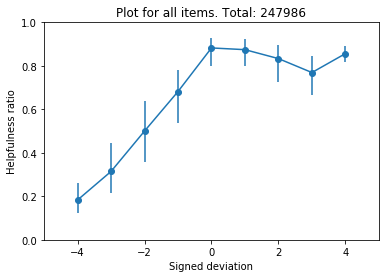

In [158]:
df_temp = pd.DataFrame({'y': y_all, 'X': X_all})
uni_x = df_temp['X'].unique()
print(uni_x)
y2 = []
e = []
e_lower = []
for uni in uni_x:
    y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
    e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
    e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
e2 = [x for _,x in sorted(zip(uni_x, e))]
e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
x2 = sorted(uni_x)
plt.xlim(-5, 5)
plt.ylim(0, 1)
plt.xlabel("Signed deviation")
plt.ylabel("Helpfulness ratio")
plt.title("Plot for all items. Total: " + str(count))

plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
#     plt.savefig("plots/min_500_reviews/signed/" + str(count) + ".png")
#     plt.close()
plt.show(plot3)

In [41]:
count = 1
# X_all = np.array([])
X_all = []
y_all = []
for i in many_reviews:
    if (count % 5000 == 0):
        print (count)
    count = count + 1
    X = []
    y = []
    item = df.loc[df['asin'] == i]
#     print (i)
#     print (item.size)
    average_rating = np.mean(item['overall'])
#     print ("Average Rating =", average_rating)
#     print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y_all.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X_all.append(round(row['overall'] - average_rating))
df_temp = pd.DataFrame({'y': y_all, 'X': X_all})
uni_x = df_temp['X'].unique()
print(uni_x)
y2 = []
e = []
e_lower = []
for uni in uni_x:
    y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
    e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
    e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
e2 = [x for _,x in sorted(zip(uni_x, e))]
e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
x2 = sorted(uni_x)
# x2 = np.asarray(x2)
# x2 = np.rint(x2)
# X_all = np.concatenate((X_all, x2))
# y_all = y_all + y3
plt.xlim(-5, 5)
plt.ylim(0, 1)
plt.xlabel("Signed deviation")
plt.ylabel("Helpfulness ratio")
plt.title("Plot for item: " + str(count))

plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
#     plt.savefig("plots/min_500_reviews/signed/" + str(count) + ".png")
#     plt.close()
plt.show(plot3)

KeyboardInterrupt: 

In [ ]:
X_all = []
y_all = []
for i in many_reviews:
    X = []
    y = []
    item = df.loc[df['asin'] == i]
    average_rating = np.mean(item['overall'])
    for index, row in item.iterrows():
        y_all.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X_all.append(round(abs(row['overall'] - average_rating)))
df_temp = pd.DataFrame({'y': y_all, 'X': X_all})
uni_x = df_temp['X'].unique()
print(uni_x)
y2 = []
e = []
e_lower = []
for uni in uni_x:
    y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
    e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
    e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
e2 = [x for _,x in sorted(zip(uni_x, e))]
e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
x2 = sorted(uni_x)
plt.xlim(-1, 5)
plt.ylim(0, 1)
plt.xlabel("Signed deviation")
plt.ylabel("Helpfulness ratio")
plt.title("Plot for item: " + str(count))

plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
#     plt.savefig("plots/min_500_reviews/signed/" + str(count) + ".png")
#     plt.close()
plt.show(plot3)

0425269205
7660
Average Rating = 3.239556135770235
Standard Deviation = 1.5344356465411608


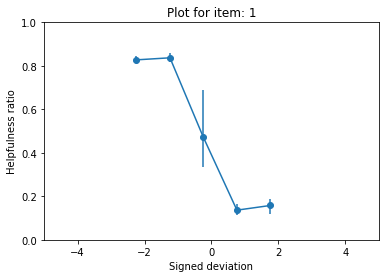

0345803485
7170
Average Rating = 2.113668061366806
Standard Deviation = 1.5632798429908643


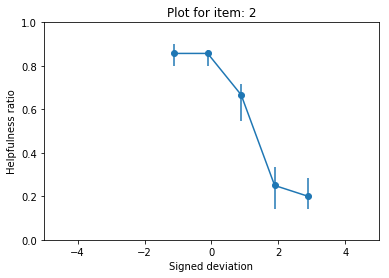

031604461X
6235
Average Rating = 3.4603047313552526
Standard Deviation = 1.6217707619549888


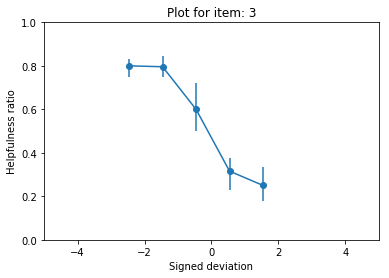

0002247399
5260
Average Rating = 3.2690114068441063
Standard Deviation = 1.4999587357642075


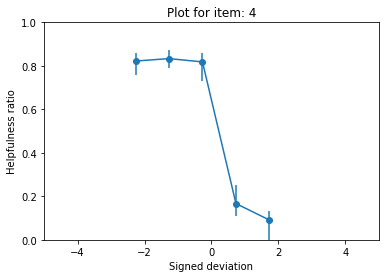

0007444117
5035
Average Rating = 3.2234359483614696
Standard Deviation = 1.7671635022579777


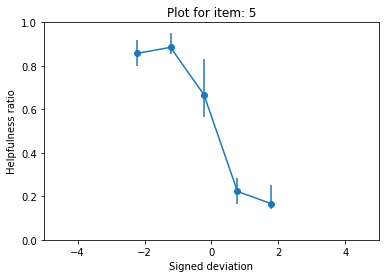

0618680004
3965
Average Rating = 3.591424968474149
Standard Deviation = 1.5420224227665382


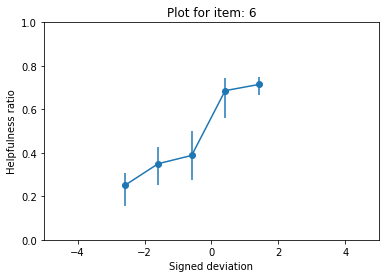

0141188936
3830
Average Rating = 3.656657963446475
Standard Deviation = 1.580189467267357


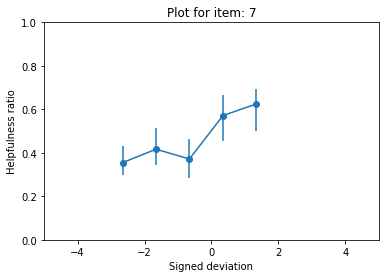

1455134767
3560
Average Rating = 4.341292134831461
Standard Deviation = 1.1792125129137228


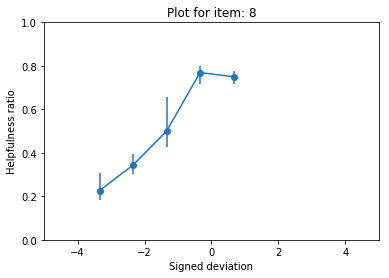

0452285216
2645
Average Rating = 3.9187145557655954
Standard Deviation = 1.4919473362854927


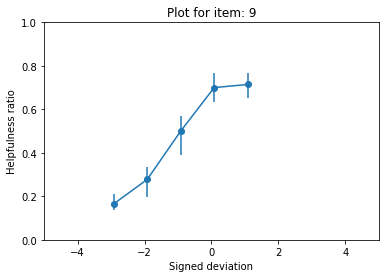

1892112000
2625
Average Rating = 1.9733333333333334
Standard Deviation = 1.686713720405207


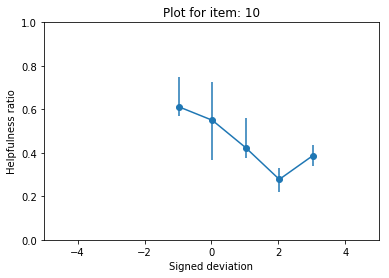

074356619X
2615
Average Rating = 2.9120458891013383
Standard Deviation = 1.7610368224585202


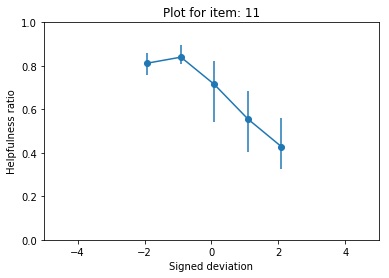

0786183616
2605
Average Rating = 3.132437619961612
Standard Deviation = 1.8883732573219243


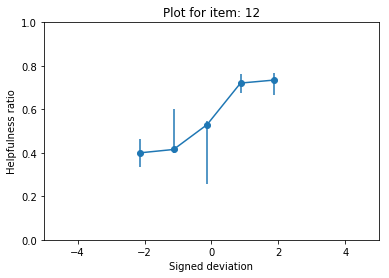

0307277674
2560
Average Rating = 3.09765625
Standard Deviation = 1.4611620398969916


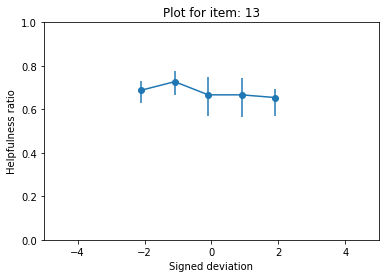

0805093079
2535
Average Rating = 3.329388560157791
Standard Deviation = 1.7653201543751476


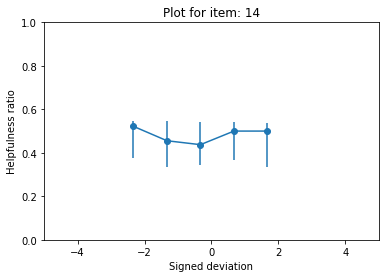

In [11]:
count = 1
for i in many_reviews:
    X = []
    y = []
    item = df.loc[df['asin'] == i]
    print (i)
    print (item.size)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(row['overall'] - average_rating)
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
#     x2 = np.asarray(x2)
#     x2 = np.rint(x2)
    plt.xlim(-5, 5)
    plt.ylim(0, 1)
    plt.xlabel("Signed deviation")
    plt.ylabel("Helpfulness ratio")
    plt.title("Plot for item: " + str(count))
    
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
#     plt.savefig("plots/min_500_reviews/signed/" + str(count) + ".png")
#     plt.close()
    count = count + 1
    plt.show(plot3)

In [37]:
count = 1
for i in many_reviews:
    X = []
    y = []
    item = df.loc[df['asin'] == i]
    print (i)
    print (item.size)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(abs(row['overall'] - average_rating))
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    plt.xlim(0, 5)
    plt.ylim(0, 1)
    plt.xlabel("Unsigned deviation")
    plt.ylabel("Helpfulness ratio")
    plt.title("Plot for item: " + str(count))
    
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
    plt.savefig("plots/min_500_reviews/unsigned/" + str(count) + ".png")
    plt.close()
    count = count + 1
#     plt.show(plot3)

0425269205
7660
Average Rating = 3.239556135770235
Standard Deviation = 1.5344356465411608
0345803485
7170
Average Rating = 2.113668061366806
Standard Deviation = 1.5632798429908643
031604461X
6235
Average Rating = 3.4603047313552526
Standard Deviation = 1.6217707619549888
0002247399
5260
Average Rating = 3.2690114068441063
Standard Deviation = 1.4999587357642075
0007444117
5035
Average Rating = 3.2234359483614696
Standard Deviation = 1.7671635022579777
0618680004
3965
Average Rating = 3.591424968474149
Standard Deviation = 1.5420224227665382
0141188936
3830
Average Rating = 3.656657963446475
Standard Deviation = 1.580189467267357
1455134767
3560
Average Rating = 4.341292134831461
Standard Deviation = 1.1792125129137228
0452285216
2645
Average Rating = 3.9187145557655954
Standard Deviation = 1.4919473362854927
1892112000
2625
Average Rating = 1.9733333333333334
Standard Deviation = 1.686713720405207
074356619X
2615
Average Rating = 2.9120458891013383
Standard Deviation = 1.761036822458

In [38]:
many_reviews2 = item_count_df[item_count_df > 100].index.values
low_sd_items = []
for i in many_reviews2:
    item = df.loc[df['asin'] == i]
    sd = np.std(item['overall'])
    if (sd < 1):
        low_sd_items.append(i)
        print ("Standard Deviation =", sd)

Standard Deviation = 0.8625258717472545
Standard Deviation = 0.8172788341012921
Standard Deviation = 0.8942092888944354
Standard Deviation = 0.7888787217576404
Standard Deviation = 0.6398241946034864
Standard Deviation = 0.9282014988121832
Standard Deviation = 0.8419716882004635
Standard Deviation = 0.9489687551024775
Standard Deviation = 0.8001360405696247
Standard Deviation = 0.9817917181132706
Standard Deviation = 0.0
Standard Deviation = 0.3983284047761735
Standard Deviation = 0.4790895783894893
Standard Deviation = 0.3382879883877223
Standard Deviation = 0.9605439230452575
Standard Deviation = 0.8523720843550042


In [39]:
count = 1
for i in low_sd_items:
    X = []
    y = []
    item = df.loc[df['asin'] == i]
    print (i)
    print (item.size)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(row['overall'] - average_rating)
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    plt.xlim(-5, 5)
    plt.ylim(0, 1)
    plt.xlabel("Signed deviation")
    plt.ylabel("Helpfulness ratio")
    plt.title("Plot for item: " + str(count))
    
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
    plt.savefig("plots/max_sd_1/signed/" + str(count) + ".png")
    plt.close()
    count = count + 1
#     plt.show(plot3)

1495472418
1835
Average Rating = 4.700272479564033
Standard Deviation = 0.8625258717472545
B00EYMXM2I
910
Average Rating = 4.708791208791209
Standard Deviation = 0.8172788341012921
B00IPI546E
870
Average Rating = 4.545977011494253
Standard Deviation = 0.8942092888944354
1941450008
860
Average Rating = 4.715116279069767
Standard Deviation = 0.7888787217576404
1484994566
800
Average Rating = 4.875
Standard Deviation = 0.6398241946034864
1630350184
715
Average Rating = 4.678321678321678
Standard Deviation = 0.9282014988121832
1482767775
675
Average Rating = 4.518518518518518
Standard Deviation = 0.8419716882004635
0312358377
630
Average Rating = 4.626984126984127
Standard Deviation = 0.9489687551024775
1630350222
610
Average Rating = 4.762295081967213
Standard Deviation = 0.8001360405696247
0761919945
595
Average Rating = 1.2941176470588236
Standard Deviation = 0.9817917181132706
B00IA6QWP8
570
Average Rating = 5.0
Standard Deviation = 0.0
1477805850
565
Average Rating = 4.902654867256637

In [40]:
count = 1
for i in low_sd_items:
    X = []
    y = []
    item = df.loc[df['asin'] == i]
    print (i)
    print (item.size)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(abs(row['overall'] - average_rating))
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    plt.xlim(0, 5)
    plt.ylim(0, 1)
    plt.xlabel("Unsigned deviation")
    plt.ylabel("Helpfulness ratio")
    plt.title("Plot for item: " + str(count))
    
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
    plt.savefig("plots/max_sd_1/unsigned/" + str(count) + ".png")
    count = count + 1
    plt.close()
#     plt.show(plot3)

1495472418
1835
Average Rating = 4.700272479564033
Standard Deviation = 0.8625258717472545
B00EYMXM2I
910
Average Rating = 4.708791208791209
Standard Deviation = 0.8172788341012921
B00IPI546E
870
Average Rating = 4.545977011494253
Standard Deviation = 0.8942092888944354
1941450008
860
Average Rating = 4.715116279069767
Standard Deviation = 0.7888787217576404
1484994566
800
Average Rating = 4.875
Standard Deviation = 0.6398241946034864
1630350184
715
Average Rating = 4.678321678321678
Standard Deviation = 0.9282014988121832
1482767775
675
Average Rating = 4.518518518518518
Standard Deviation = 0.8419716882004635
0312358377
630
Average Rating = 4.626984126984127
Standard Deviation = 0.9489687551024775
1630350222
610
Average Rating = 4.762295081967213
Standard Deviation = 0.8001360405696247
0761919945
595
Average Rating = 1.2941176470588236
Standard Deviation = 0.9817917181132706
B00IA6QWP8
570
Average Rating = 5.0
Standard Deviation = 0.0
1477805850
565
Average Rating = 4.902654867256637